In [35]:
import pandas as pd
import missingno as msno
import numpy as np

import pprint

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# Домашняя работа 6.2
## Урок 2. Метрики качества классификации ч.1

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes).

In [36]:
titanic_df_train = pd.read_csv('train.csv')
titanic_df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
titanic_df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
titanic_df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

<AxesSubplot:>

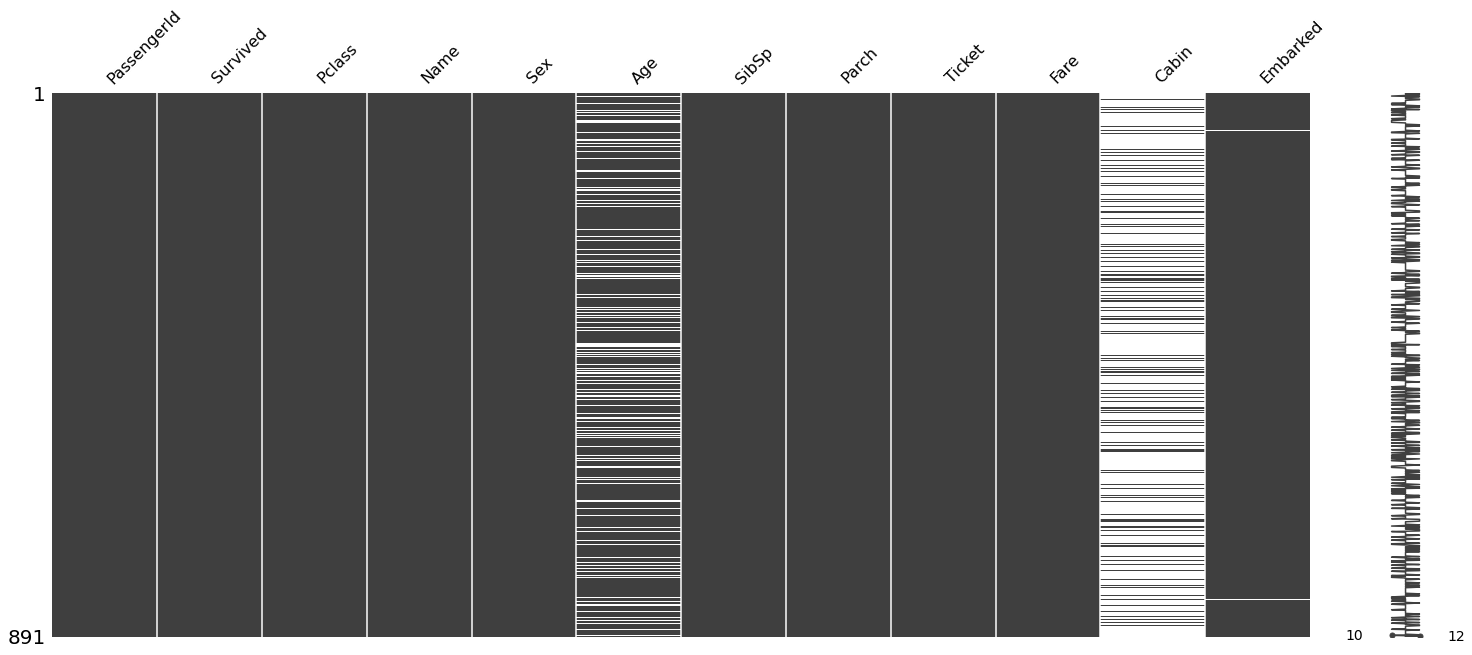

In [39]:
msno.matrix(titanic_df_train)

In [40]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
titanic_df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

In [42]:
age_median = titanic_df_train.groupby('Sex')['Age'].median()

In [43]:
age_median

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [44]:
for name_col in titanic_df_train.columns[-2:]:
    titanic_df_train[name_col] = np.where((titanic_df_train[name_col].isnull() == True),
                                   'U',
                                   titanic_df_train[name_col])

for sex in ['female', 'male']:
    titanic_df_train['Age'] = np.where((titanic_df_train['Age'].isnull() == True) &
                                   (titanic_df_train['Sex'] == sex),
                                   age_median[sex],
                                   titanic_df_train['Age'])

# titanic_df_train['Age'] = np.where((titanic_df_train['Age'].isnull() == True) &
#                                    (titanic_df_train['Sex'] == 'male'),
#                                    age_median['male'],
#                                    titanic_df_train['Age'])


In [45]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [46]:
titanic_df_train[titanic_df_train['PassengerId'].isin([6, 20])].isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,False,False,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,False,False


### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [47]:
titanic_df_train['Sex'] = np.where(titanic_df_train['Sex'] == 'male', 0, 1)

Embarked_dict = {"U": 0, "S": 1, "C" : 2, "Q": 3}
for key in Embarked_dict.keys(): #Есть ли другой метод?
    titanic_df_train['Embarked'] = np.where(titanic_df_train['Embarked'] == key, Embarked_dict[key], titanic_df_train['Embarked'])

In [48]:
titanic_df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,inplace = True)

In [49]:
titanic_df_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,29.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [50]:
titanic_df_train_Survived = titanic_df_train.pop('Survived')

In [51]:
rs = 17 #Воспроизводимость
train_test_list = train_test_split(titanic_df_train,
                                                    titanic_df_train_Survived,
                                                    random_state = rs)

### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [52]:
def model_fit(classifier, train_test_list):
    """Функция для обучения модели.
    Принимает: Модель и Список массивов для обучения и теста модели
    Возвращает: Dataframe из двух колонок: Survived и Predict"""
    model = classifier.fit(train_test_list[0], train_test_list[2])
    predict = model.predict(train_test_list[1])

    test_pred = pd.DataFrame(train_test_list[3])
    test_pred['Predict'] = predict
    print('Применен классификатор: ',  end='')
    pprint.pprint(model)
    return test_pred

def metric_col(test_pred):
    """Функция для расчета метрик моделей. 
    Принимает: Dataframe из двух колонок: Survived и Predict
    Возвращает: Список из значений метрик"""

    TP = ((test_pred['Predict'] == test_pred['Survived']) &
          (test_pred['Survived'] == 1)).sum()

    FP = ((test_pred['Predict'] != test_pred['Survived']) &
      (test_pred['Survived'] == 0)).sum()

    FN = ((test_pred['Predict'] != test_pred['Survived']) &
      (test_pred['Predict'] == 0)).sum()

    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)

    print('Полнота:\t %.7f' % Recall)
    print('Точность:\t %.7f' % Precision)

    return Precision, Recall

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_df_TP = model_fit(knn, train_test_list)
knn_metrics = metric_col(knn_df_TP)

Применен классификатор: KNeighborsClassifier()
Полнота:	 0.4782609
Точность:	 0.6769231


In [54]:
dtc = DecisionTreeClassifier()
dtc_df_TP = model_fit(dtc, train_test_list)
dtc_metrics = metric_col(dtc_df_TP)

Применен классификатор: DecisionTreeClassifier()
Полнота:	 0.7065217
Точность:	 0.7926829


In [55]:
nb = GaussianNB()
nb_df_TP = model_fit(nb, train_test_list)
nb_metrics = metric_col(nb_df_TP)

Применен классификатор: GaussianNB()
Полнота:	 0.7065217
Точность:	 0.7647059


In [56]:
clf = LogisticRegression(random_state=rs)
clf_df_TP = model_fit(clf, train_test_list)
clf_metrics = metric_col(clf_df_TP)

Применен классификатор: LogisticRegression(random_state=17)
Полнота:	 0.6956522
Точность:	 0.7901235


### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

1. Точность
2. Полнота
3. Полнота
4. Полнота
5. Точность
6. Полнота
7. Точность

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

 **Точность - Важнне не ошибиться в том кто выживет, а не ошибочно не умрет**




### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.



Матрица ошибок для классификатора: KNeighborsClassifier()


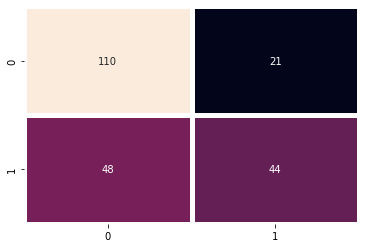

Расчет с помощью библиотеки: 
Полнота:	 0.4782608695652174 
Точность:	 0.676923076923077

Собственный расчет метрики:
Полнота:	 0.4782609
Точность:	 0.6769231


Матрица ошибок для классификатора: DecisionTreeClassifier()


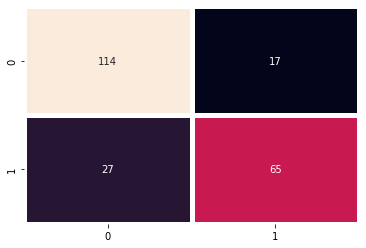

Расчет с помощью библиотеки: 
Полнота:	 0.7065217391304348 
Точность:	 0.7926829268292683

Собственный расчет метрики:
Полнота:	 0.7065217
Точность:	 0.7926829


Матрица ошибок для классификатора: GaussianNB()


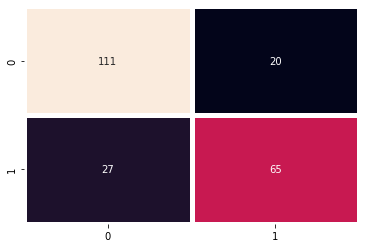

Расчет с помощью библиотеки: 
Полнота:	 0.7065217391304348 
Точность:	 0.7647058823529411

Собственный расчет метрики:
Полнота:	 0.7065217
Точность:	 0.7647059


Матрица ошибок для классификатора: LogisticRegression(random_state=17)


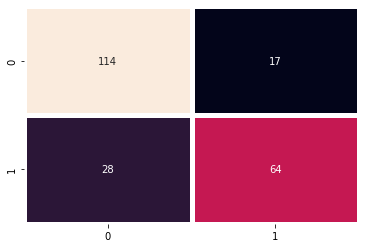

Расчет с помощью библиотеки: 
Полнота:	 0.6956521739130435 
Точность:	 0.7901234567901234

Собственный расчет метрики:
Полнота:	 0.6956522
Точность:	 0.7901235


In [57]:
classifier_TP_list = [knn_df_TP, dtc_df_TP, nb_df_TP, clf_df_TP]
classifier_name_list = [knn, dtc, nb, clf]

for i, model in enumerate(classifier_TP_list):
    print('\n\nМатрица ошибок для классификатора: ',  end='')
    pprint.pprint(classifier_name_list[i])
    c_matrix = confusion_matrix(model['Survived'], model['Predict'])

    ax = plt.axes()
    sns.heatmap(c_matrix, annot = True, cbar = False, linewidths = 5, fmt="d")
    plt.show()

    print('Расчет с помощью библиотеки:',
          '\nПолнота:\t', recall_score(y_true=model['Survived'], y_pred=model['Predict']),
            '\nТочность:\t', precision_score(y_true=model['Survived'], y_pred=model['Predict']))
    print('\nСобственный расчет метрики:')
    metric_col(model)

### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

**Лучший ответ по метрике Полнота давала модель DecisionTreeClassifier. Точность я расчитал по всем моделям выше**

# Домашняя работа 6.4
## Урок 4. Метрики качества классификации ч.2

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

### Классификатором, который давал наименьшее значение recall, является KNeighborsClassifier(n_neighbors=5)

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_df_TP = model_fit(knn, train_test_list)
knn_metrics = metric_col(knn_df_TP)

Применен классификатор: KNeighborsClassifier()
Полнота:	 0.4782609
Точность:	 0.6769231


In [59]:
print('Расчет с помощью библиотеки:',
          '\nПолнота:\t', recall_score(y_true=knn_df_TP['Survived'], y_pred=knn_df_TP['Predict']),
          '\nТочность:\t', precision_score(y_true=knn_df_TP['Survived'], y_pred=knn_df_TP['Predict']))

Расчет с помощью библиотеки: 
Полнота:	 0.4782608695652174 
Точность:	 0.676923076923077


In [60]:
print('Расчет f1-меры с помощью библиотеки:\t', f1_score(y_true=knn_df_TP['Survived'], y_pred=knn_df_TP['Predict']))

Расчет f1-меры с помощью библиотеки:	 0.5605095541401274


In [61]:
print('Классификатор: ', end='')
pprint.pprint(classifier_name_list[0])
print(classification_report(y_true=knn_df_TP['Survived'], y_pred=knn_df_TP['Predict']))

Классификатор: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.48      0.56        92

    accuracy                           0.69       223
   macro avg       0.69      0.66      0.66       223
weighted avg       0.69      0.69      0.68       223



### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [62]:
#classifier_TP_list = [knn_df_TP, dtc_df_TP, nb_df_TP, clf_df_TP]
#classifier_name_list = [knn, dtc, nb, clf]

for i, model in enumerate(classifier_TP_list):
    if i != 0:
        print('\n\nОтчет по метрикам классификатора ',  end='')
        pprint.pprint(classifier_name_list[i])

        print(classification_report(y_true=model['Survived'], y_pred=model['Predict']))



Отчет по метрикам классификатора DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       131
           1       0.79      0.71      0.75        92

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



Отчет по метрикам классификатора GaussianNB()
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



Отчет по метрикам классификатора LogisticRegression(random_state=17)
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       131
           1       0.79      0.70      0.74        92

   

### 2.3

**1**. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle =  True, random_state=rs)
#skf_data = skf.split(titanic_df_train, titanic_df_train_Survived)

**2**. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.

In [64]:
x_linspace = np.linspace(-1, 2, num =500)

**3**. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).

In [65]:
logregCV = LogisticRegressionCV(Cs = x_linspace, cv = skf, scoring= 'roc_auc', random_state=rs)

**4**. Обучите полученную модель на тренировочных данных.

In [66]:
model_logregCV = logregCV.fit(train_test_list[0], train_test_list[2])
best_c = model_logregCV.C_

/Users/daniilzorin/opt/anaconda3/envs/skillbox/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/daniilzorin/opt/anaconda3/envs/skillbox/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:198: RuntimeWarning: overflow encountered in double_scalars
  loss += 0.5 * l2_reg_strength * (weights @ weights)
/Users/daniilzorin/opt/anaconda3/envs/skillbox/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:198: RuntimeWarning: overflow encountered in matmul
  loss += 0.5 * l2_reg_strength * (weights @ weights)
/Users/dan

In [67]:
best_c

array([-1.])

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

Text(0, 0.5, 'Mean CV-auc_roc')

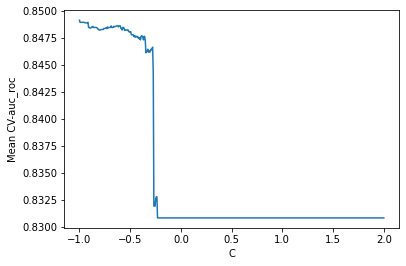

In [68]:
plt.plot(x_linspace , np.mean(model_logregCV.scores_[1], axis=0))

plt.xlabel('C')

plt.ylabel('Mean CV-auc_roc')

Best value of C:  [-1.]


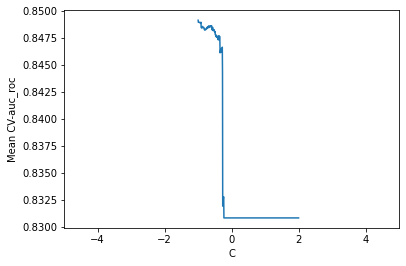

In [85]:
best_c = model_logregCV.C_



plt.plot(x_linspace, np.mean(model_logregCV.scores_[1], axis=0))

plt.xlabel('C')

plt.ylabel('Mean CV-auc_roc')

plt.xlim((-5, 5)) # область может отличаться у студентов - необходимо, чтобы лучшее значение C присутствовало в области



print('Best value of C: ', best_c)

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [70]:
model_logregCV.C_

array([-1.])

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

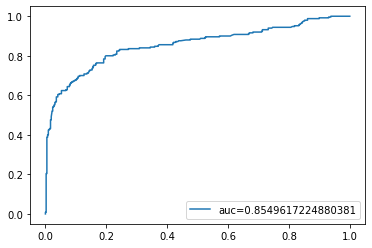

In [71]:
probas = model_logregCV.predict_proba(train_test_list[0])
fpr, tpr, _ = roc_curve(train_test_list[2], probas[:, 1])
auc = roc_auc_score(train_test_list[2], probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

# Домашняя работа 6.6

## Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [72]:
wine_dataset = load_wine()
wine_data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(wine_data.iloc[:, [9,11,12]],
                                   wine_dataset['target'],
                                   random_state = rs)

**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [73]:
skf = StratifiedKFold(n_splits=5, shuffle =  True, random_state=rs)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [74]:
clf = LogisticRegression(random_state=rs, multi_class='ovr')
model_clf = clf.fit(X_train, y_train)

In [75]:
print(cross_val_score(estimator=model_clf, X=X_train, y=y_train, cv=skf))
print('Среднее:', cross_val_score(estimator=model_clf, X=X_train, y=y_train, cv=skf).mean())

[0.96296296 0.85185185 0.92592593 0.92307692 0.88461538]
Среднее: 0.9096866096866097


In [76]:
clf_predictions = model_clf.predict(X_test) ### было knn_predictions = knn.predict(x_test)
accuracy = accuracy_score(y_test, clf_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9111111111111111


### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [77]:
svc = SVC(random_state=rs)
model_svc = svc.fit(X_train, y_train)

In [78]:
print(cross_val_score(estimator=model_svc, X=X_train, y=y_train, cv=skf))
print('Среднее:', cross_val_score(estimator=model_svc, X=X_train, y=y_train, cv=skf).mean())

[0.7037037  0.59259259 0.7037037  0.73076923 0.73076923]
Среднее: 0.6923076923076923


In [79]:
svc_predictions = model_svc.predict(X_test) ### было knn_predictions = knn.predict(x_test)
accuracy = accuracy_score(y_test, svc_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6222222222222222


### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

LogisticRegression(multi_class='ovr', random_state=17)


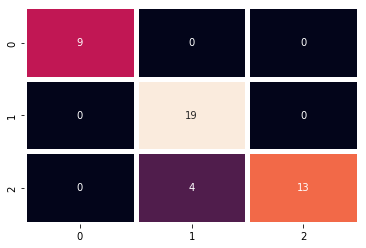

In [80]:
pprint.pprint(clf)
c_matrix_clf = confusion_matrix(y_test, clf_predictions)

ax = plt.axes()
sns.heatmap(c_matrix_clf , annot = True, cbar = False, linewidths = 5, fmt="d")
plt.show()


SVC(random_state=17)


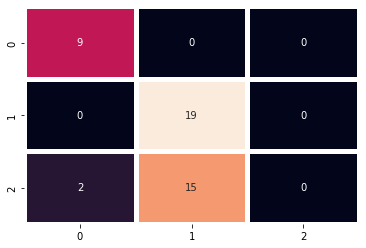

In [81]:
pprint.pprint(svc)
c_matrix_svc = confusion_matrix(y_test, svc_predictions)

ax = plt.axes()
sns.heatmap(c_matrix_svc , annot = True, cbar = False, linewidths = 5, fmt="d")
plt.show()

Получается, что модель LogisticRegression ошибается при определении класса 2, присвоив ему класс 1
А модель SVC совсем не определяет класс 2, присвоив ему в большинсве случаев 1ый класс, и меньше 0 класс.